# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.text_proc import illustration
from jcopml.plot import plot_missing_value
from jcopml.plot import plot_confusion_matrix
from jcopml.plot import plot_roc_curve
from jcopml.plot import plot_classification_report
from jcopml.plot import plot_pr_curve

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_eng = stopwords.words('english') 
import string

import seaborn as sns

# 2. Import Dataset

In [2]:
df = [line.rstrip() for line in open('SMSSpamCollection')]
df

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

In [3]:
df = pd.read_csv('SMSSpamCollection', names=['label','message'], sep='\t')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.label = df.label.replace({'ham': 0 ,'spam': 1})

In [5]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 3. Exploratory Data Analysis (EDA)

### Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [7]:
df.shape

(5572, 2)

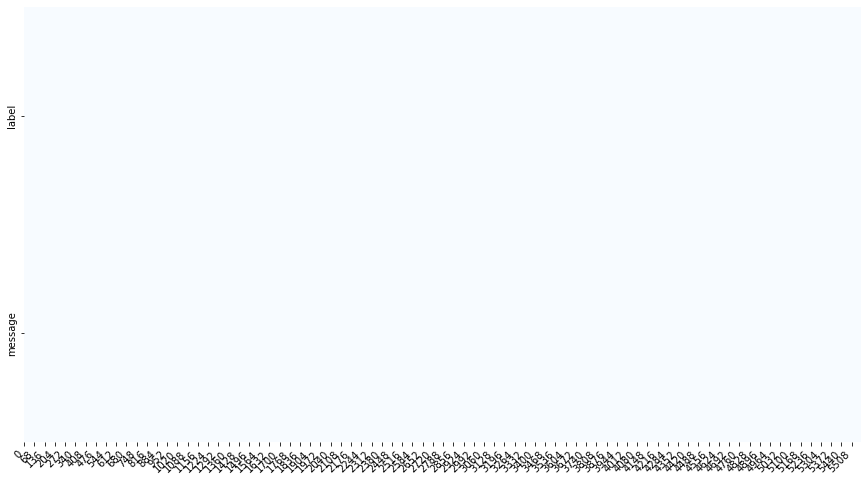

In [8]:
plot_missing_value(df)

### Data Description

In [9]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
0        4825   4516                             Sorry, I'll call later   30
1         747    653  Please call our customer service representativ...    4

### Count a Character in Text Message

In [12]:
df['Length_Char'] = df['message'].apply(len)
df.head()

,label,message,Length_Char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

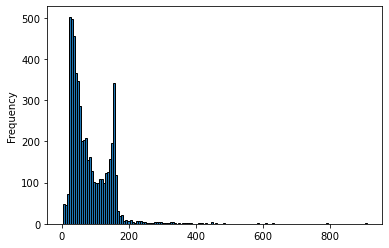

In [13]:
# Visualize a length of Character in text message

df['Length_Char'].plot.hist(bins = 150, edgecolor='black')

In [14]:
df.Length_Char.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length_Char, dtype: float64

In [15]:
#Grab the maximum character in text message

df[df['Length_Char'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Visualize Label Distribution

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

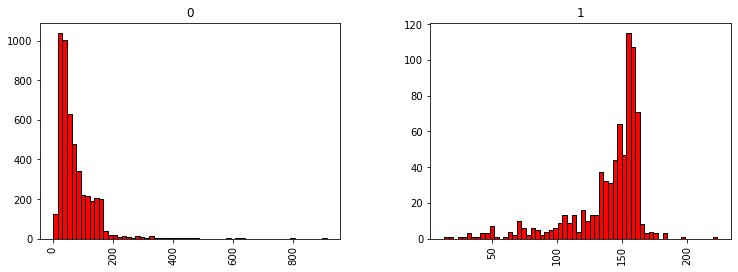

In [16]:
df.hist(column='Length_Char', by='label', bins =60, figsize=(12,4), edgecolor='black', color = 'red')

## Cleaning Dataset

In [17]:
df.message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [18]:
import re

In [19]:
def clean_data(text):
    text = text.lower()
    clean_word = word_tokenize(text)
    clean_word = [word for word in clean_word if word not in punctuation]
    clean_word = [word for word in clean_word if len(word) > 1 and word.isalpha()]
    clean_word = [word for word in clean_word if word not in sw_eng]
    emoji_removal = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    clean_word = ' '.join(clean_word)
    return emoji_removal.sub(r'', clean_word)

In [20]:
df.message = df.message.apply(clean_data)
df.message

0       go jurong point crazy available bugis great wo...
1                                   ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts may...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                              going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

## Check Imbalanced Dataset

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

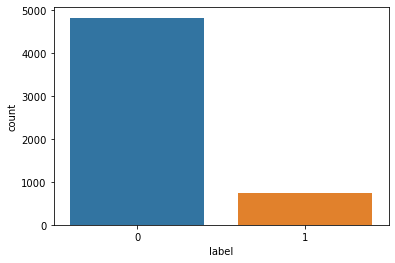

In [21]:
sns.countplot(df.label)

In [22]:
df.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

# 4. Dataset Splitting

In [23]:
X = df.message
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

# 5. Modeling

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from jcopml.tuning import random_search_params as rsp

In [25]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer()),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.4min finished
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:04:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'algo__colsample_bytree': 0.6918516030703091, 'algo__gamma': 1, 'algo__learning_rate': 0.1216411342539395, 'algo__max_depth': 3, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.011502956321912733, 'algo__reg_lambda': 0.009461469059966103, 'algo__subsample': 0.7865052773762229}
0.9838456360780794 0.9636508648621703 0.9659192825112107


# 6. Hyperparameters Tuning

In [26]:
from jcopml.tuning.space import Integer, Real

In [27]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer()),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

parameter = {'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-4, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=100, high=350),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__gamma': Integer(low=3, high=10),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=0.8, prior='log-uniform')}

model = RandomizedSearchCV(pipeline, parameter, cv=3, n_iter=75, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  2.8min finished
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'algo__colsample_bytree': 0.8725714766587107, 'algo__gamma': 3, 'algo__learning_rate': 0.05240577158421572, 'algo__max_depth': 7, 'algo__n_estimators': 316, 'algo__reg_alpha': 0.29955205603841967, 'algo__reg_lambda': 0.02725020460470398, 'algo__subsample': 0.5671637367652818}
0.9838456360780794 0.9596127266382987 0.968609865470852


# 7. Evaluation

## 7.1. Classification Report

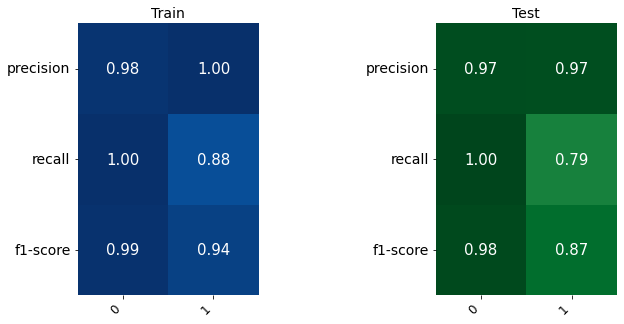

In [28]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [29]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       1.00      0.88      0.94       598

    accuracy                           0.98      4457
   macro avg       0.99      0.94      0.96      4457
weighted avg       0.98      0.98      0.98      4457


Test report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.97      0.79      0.87       149

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## 7.2. Confusion Matrix

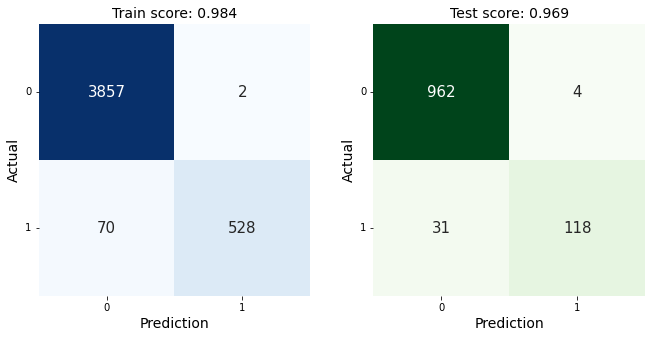

In [30]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

## 7.3. ROC AUC Curve

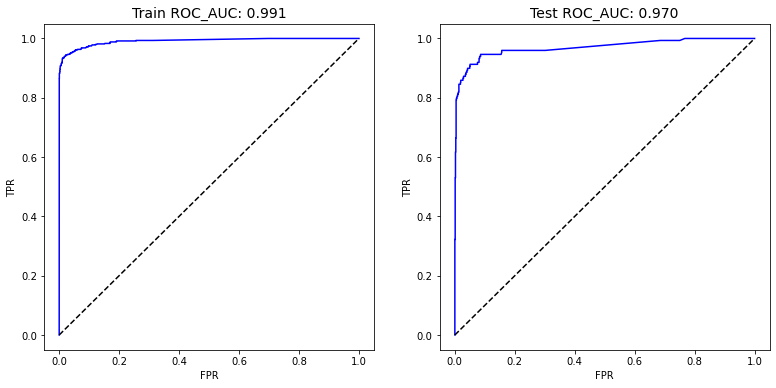

In [31]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

## 7.4. Precision-Recall Curve

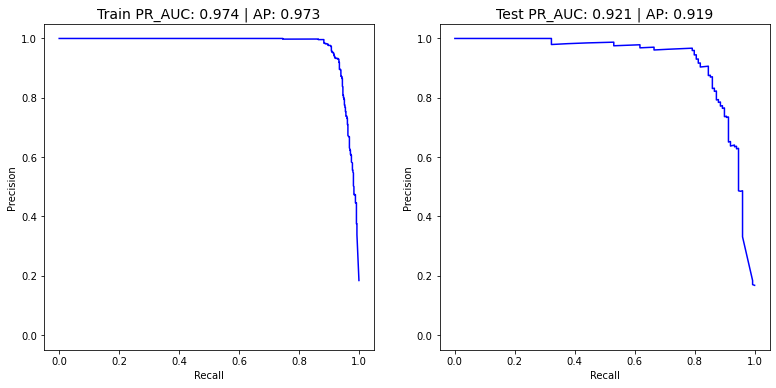

In [32]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

### Result Analysis

In [40]:
df_analysis = pd.DataFrame(X_test)
df_analysis['Prediction'] = model.predict(X_test)
df_analysis['Actual'] = y_test
df_analysis

,message,Prediction,Actual
2825,need buy lunch eat maggi mee,0,0
3695,ok im sure time finish tomorrow wan na spend e...,0,0
3904,waiting car mum lor leh reach home already,0,0
576,cash prize claim,1,1
2899,home come within min,0,0
...,...,...,...
854,ah poor baby hope urfeeling bettersn luv probt...,0,0
5044,ic lol play doors sometime yo,0,0
2015,ambrith madurai met arun dha marrge remembr,0,0
3380,dear umma called,0,0


In [41]:
df_analysis[(df_analysis['Prediction'] == 0) & (df_analysis['Actual'] == 1)] 

,message,Prediction,Actual
5,freemsg hey darling week word back like fun st...,0,1
2267,forwarded free entry weekly comp send word enter,0,1
1963,free text messages valid december,0,1
3981,ringtoneking,0,1
1229,free entry weekly comp send word enter cust care,0,1
3360,sorry missed call let talk time,0,1
3548,rock yr chik get filthy films xxx pics yr phon...,0,1
5449,latest news police station toilet stolen cops ...,0,1
4616,sunshine quiz win super sony dvd recorder cann...,0,1
1635,eerie nokia tones rply tone title eg tone drac...,0,1


In [42]:
df_analysis[(df_analysis['Prediction'] == 1) & (df_analysis['Actual'] == 0)] 

,message,Prediction,Actual
4009,forgot working today wan na chat things ok dro...,1,0
5046,sent jd customer service cum accounts executiv...,1,0
779,happy new year dear brother really miss got nu...,1,0
1364,yetunde sorry moji seem busy able go shopping ...,1,0


# Save Model

In [34]:
save_model(model.best_estimator_, 'SMS_Spam_Classifier_XGBoost_Classifier.pkl')

Model is pickled as model/SMS_Spam_Classifier_XGBoost_Classifier.pkl
